# Practicing K-Means:  Isotopic Composition Plutonium Batches




---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html).

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,rownames,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


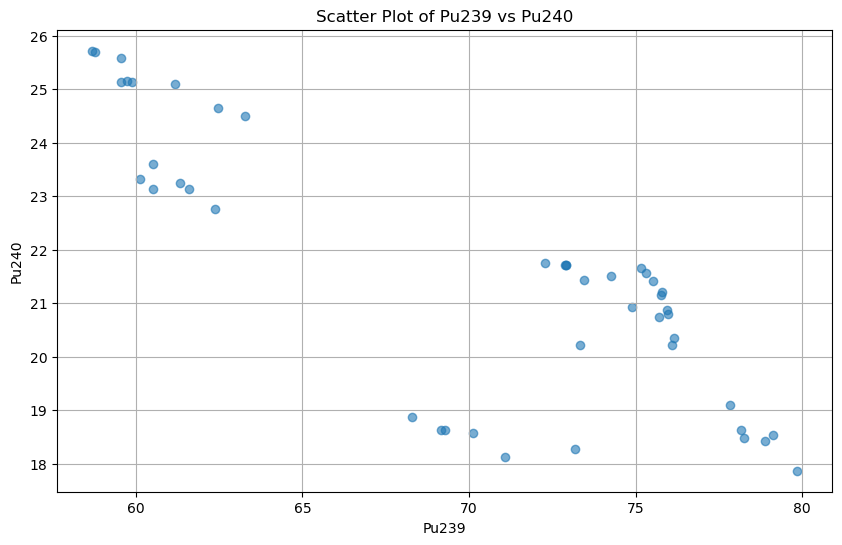

In [7]:
# A:
# Select only the columns "Pu239" and "Pu240"
features_df = df[['Pu239', 'Pu240']]

# Plot "Pu239" and "Pu240" for visual reference
plt.figure(figsize=(10, 6))
plt.scatter(features_df['Pu239'], features_df['Pu240'], alpha=0.6)
plt.title('Scatter Plot of Pu239 vs Pu240')
plt.xlabel('Pu239')
plt.ylabel('Pu240')
plt.grid(True)
plt.show()

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [10]:
# A:
from sklearn.cluster import KMeans 
# Initialize an instance of KMeans with K=3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the selected features
kmeans.fit(features_df)

# Retrieve the cluster labels
cluster_labels = kmeans.labels_


C:\Users\saads\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saads\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Assign clusters assignments (predictions) back to the original dataframe

In [12]:
# A: 

# Assign the cluster labels back to the original dataframe
features_df['Cluster'] = cluster_labels

# Display the first few rows of the dataframe with cluster labels
print(features_df.head())

    Pu239   Pu240  Cluster
0  75.804  21.204        2
1  75.515  21.408        2
2  75.175  21.668        2
3  78.872  18.428        2
4  73.317  20.223        1


C:\Users\saads\AppData\Local\Temp\ipykernel_14024\620578008.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df['Cluster'] = cluster_labels


### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

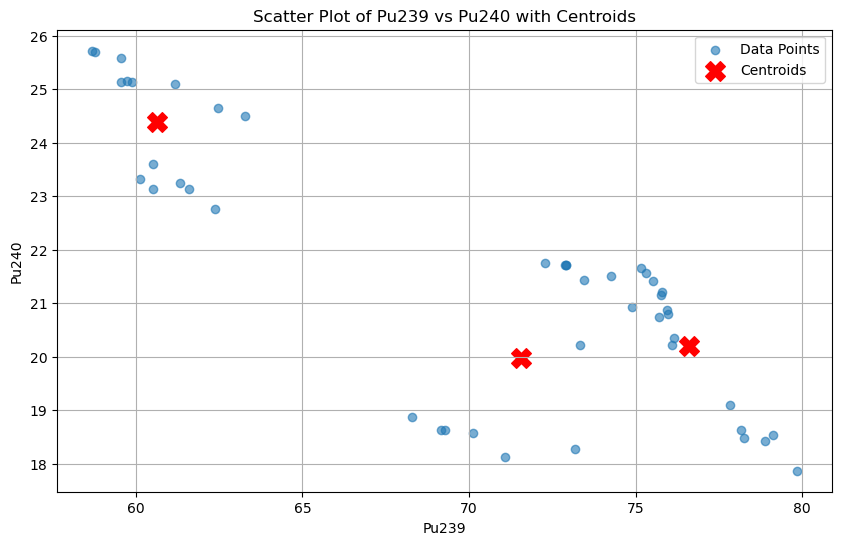

In [13]:
# A:

# Retrieve the coordinates of the centroids
centroids = kmeans.cluster_centers_

# Plot "Pu239" and "Pu240" for visual reference
plt.figure(figsize=(10, 6))
plt.scatter(features_df['Pu239'], features_df['Pu240'], alpha=0.6, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Scatter Plot of Pu239 vs Pu240 with Centroids')
plt.xlabel('Pu239')
plt.ylabel('Pu240')
plt.legend()
plt.grid(True)
plt.show()

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

C:\Users\saads\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saads\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


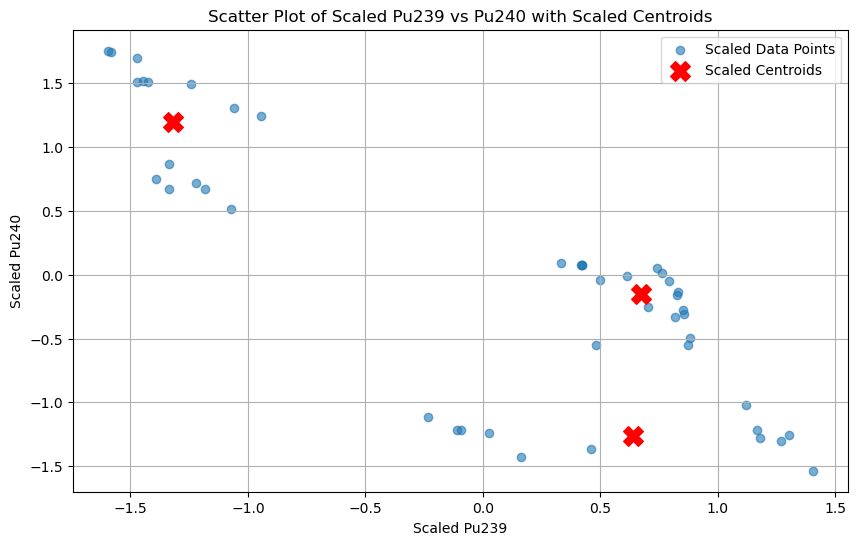

In [18]:
# A:

# Select only the columns "Pu239" and "Pu240"
features_df = df[['Pu239', 'Pu240']]

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df[['Pu239', 'Pu240']])

# Initialize an instance of KMeans with K=3 clusters for scaled data
kmeans_scaled = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the scaled features
kmeans_scaled.fit(scaled_features)

# Retrieve the cluster labels for the scaled data
scaled_cluster_labels = kmeans_scaled.labels_

# Retrieve the coordinates of the centroids for the scaled data
scaled_centroids = kmeans_scaled.cluster_centers_

# Plot scaled "Pu239" and "Pu240" for visual reference with centroids
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], alpha=0.6, label='Scaled Data Points')
plt.scatter(scaled_centroids[:, 0], scaled_centroids[:, 1], c='red', marker='X', s=200, label='Scaled Centroids')
plt.title('Scatter Plot of Scaled Pu239 vs Pu240 with Scaled Centroids')
plt.xlabel('Scaled Pu239')
plt.ylabel('Scaled Pu240')
plt.legend()
plt.grid(True)
plt.show()

### Might as well check that silhouette score before and after scaling
Just to confirm what your eyes are telling you.

In [19]:
# A: 
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the original (unscaled) data
original_silhouette_score = silhouette_score(features_df[['Pu239', 'Pu240']], cluster_labels)

# Calculate the silhouette score for the scaled data
scaled_silhouette_score = silhouette_score(scaled_features, scaled_cluster_labels)

original_silhouette_score, scaled_silhouette_score


(0.5950619279180938, 0.633217477686232)